<a href="https://colab.research.google.com/github/A-76/PhonePriceAnalysis/blob/main/PhonePriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("./used_device_data.csv")

In [ ]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#correlation analysis
df.corr()

<ipython-input-43-4c574c3a4ca3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150203,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
rear_camera_mp,0.150203,1.000000,0.403584,0.016502,0.226240,0.251771,-0.082951,0.355884,-0.160197,0.551814,0.497598
front_camera_mp,0.271640,0.403584,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
internal_memory,0.071291,0.016502,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.226240,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.251771,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.082951,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.355884,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.160197,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.551814,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


In [ ]:
#Try 2 imputation techniques and see which has better performance. impute the mode , drop the rows. ANother would be to cluster based on
#other attributes and select the closest value then.
df = df.dropna()

In [ ]:
#How to
y = df["normalized_used_price"]
X = df.drop(columns=["normalized_used_price","os"])

In [ ]:
X.head()

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,Honor,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,Honor,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,Honor,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,Honor,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,Honor,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [ ]:
#how to convert yes to 1 and no to 0
X["4g"] = X["4g"].eq('yes').mul(1)
X["5g"] = X["5g"].eq('yes').mul(1)
X.head()

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,Honor,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,Honor,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,Honor,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,Honor,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,Honor,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [ ]:
#using label encoding to conver the device brand column into numeric form
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
X['device_brand']= label_encoder.fit_transform(X['device_brand'])

X['device_brand'].unique()

array([10, 24,  9, 11, 12, 15, 16, 14, 18, 21, 23, 27, 30, 32, 33,  2,  3,
        0,  1,  4,  5,  6,  7,  8, 13, 17, 19, 20, 22, 25, 26, 28, 29, 31])

In [ ]:
X['internal_memory'].unique()
#X['internal_memory'].unique()

array([6.400e+01, 1.280e+02, 3.200e+01, 1.600e+01, 2.560e+02, 5.120e+02,
       8.000e+00, 4.000e+00, 5.000e-01, 2.000e-01, 1.000e-01, 6.000e-02,
       1.024e+03, 2.400e+01, 1.000e-02])

In [ ]:
X.head()

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,10,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,10,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,10,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,10,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,10,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [ ]:
#splitting the training data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
2660,24,12.83,1,0,13.0,8.0,128.0,4.0,3020.0,140.0,2017,623,6.110358
2583,27,30.53,0,0,8.0,2.0,32.0,4.0,9500.0,750.0,2014,689,6.289307
1593,16,15.24,0,0,8.0,1.6,32.0,4.0,3000.0,171.5,2014,859,5.196949
1668,14,12.83,1,0,13.0,5.0,16.0,4.0,2800.0,133.0,2016,681,5.294611
706,3,15.24,1,0,13.0,8.0,64.0,4.0,3300.0,168.0,2018,511,5.523818


In [ ]:
#deal with missing values (imputation)
rows_with_nan = X_train[X_train.isnull().any(axis=1)]

# Display the rows with NaN values
#print(rows_with_nan)
df.isna().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

array([[<Axes: title={'center': 'rear_camera_mp'}>]], dtype=object)

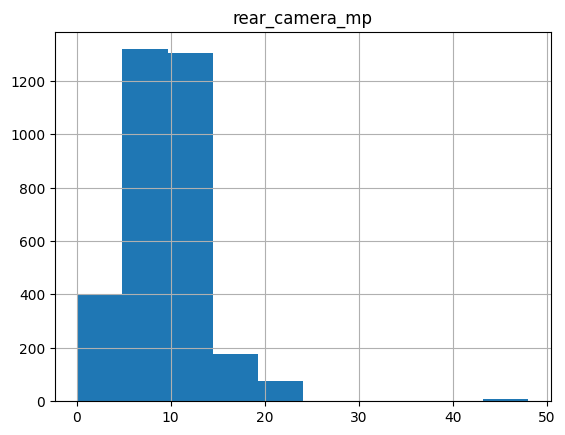

In [ ]:
df.hist(column = 'rear_camera_mp')

In [ ]:
df[df['device_brand'] == "Infinix" ]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,48.0,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,48.0,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,48.0,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,48.0,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,48.0,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


In [ ]:
#need to normalize - screen size, rear camera mp, front camera mp, internal memory, ram battery, weight, days used, normalized_new_price
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize = ['screen_size', 'rear_camera_mp', 'front_camera_mp','internal_memory','ram','battery','weight','release_year','days_used']

# Create a MinMaxScaler object
scaler = StandardScaler() #StandardScaler

# Apply normalization to the selected columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


In [ ]:
X_train.head()

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
2660,24,-0.195046,1,0,0.682719,0.277507,0.993660,0.012152,-0.036965,-0.463483,0.549165,-0.291764,6.110358
2583,27,4.422923,0,0,-0.300872,-0.616707,-0.245446,0.012152,4.968394,6.323791,-0.812993,-0.015061,6.289307
1593,16,0.433728,0,0,-0.300872,-0.676321,-0.245446,0.012152,-0.052413,-0.112993,-0.812993,0.697660,5.196949
1668,14,-0.195046,1,0,0.682719,-0.169600,-0.451963,0.012152,-0.206900,-0.541370,0.095112,-0.048601,5.294611
706,3,0.433728,1,0,0.682719,0.277507,0.167590,0.012152,0.179316,-0.151936,1.003217,-0.761321,5.523818


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train,y_train)

In [ ]:
reg.score(X_test,y_test)

0.8318852458819568

In [ ]:
from sklearn.metrics import mean_squared_error
# real value

# predicted value
predicted = reg.predict(X_test)
# calculate errors
errors = mean_squared_error(y_test, predicted)
# report error
print(errors)

0.0578831800154589


In [ ]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }


grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.8489119425556968

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}
